<a href="https://colab.research.google.com/github/Gressling/digitalchemistry.org/blob/main/batch_analysis/unitOperationsS88/Stirring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#go

StirringSpeed: 500
StirringTime: 30
StirringDirection: Clockwise
StirrerDesign: Propeller
StirrerSizeAndShape: Diameter: 10 cm, Length: 15 cm
ContainerGeometry: Cylindrical, 500 mL
MaterialOfConstruction: Stainless Steel
OperationalLimits: Max RPM: 1200, Min RPM: 100
Viscosity: 1.2 cP
ShearRate: 200
AdditionalAgitationMechanisms: GasSparging
SafetyMeasures: Safety shields, Emergency stop
StirringRateProfiles: Linear ramp-up over 5 minutes


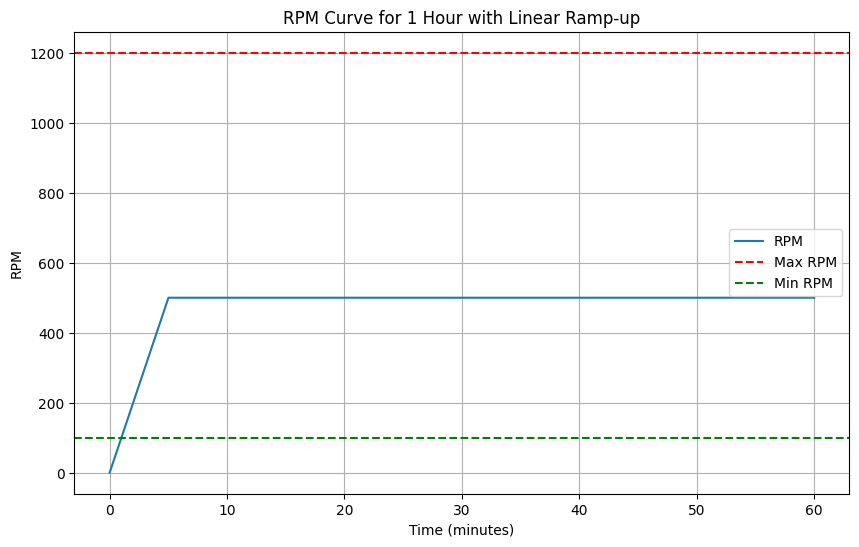

In [3]:
# Import required libraries
import requests
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np

# Load the XML from URL
url = 'https://raw.githubusercontent.com/Gressling/S88-light/main/operations/Stirring/Stirring-example.xml'
response = requests.get(url)
root = ET.fromstring(response.content)

# Initialize empty dictionary to store data
stirring_data = {}

# Populate the dictionary with the data from XML
for element in root:
    stirring_data[element.tag] = element.text

# Display the data
for key, value in stirring_data.items():
    print(f"{key}: {value}")

# Plotting the RPM curve for 1 hour with Linear Ramp-up over 5 minutes
time = np.linspace(0, 60, 600)  # 1 hour in minutes, with intervals of 0.1 minute
target_rpm = int(stirring_data['StirringSpeed'])
max_rpm = int(stirring_data['OperationalLimits'].split('Max RPM: ')[1].split(',')[0])
min_rpm = int(stirring_data['OperationalLimits'].split('Min RPM: ')[1])

# Linear ramp-up for first 5 minutes
ramp_time = 5  # 5 minutes
ramp_indices = np.where(time <= ramp_time)
rpm = np.zeros_like(time)
rpm[ramp_indices] = (target_rpm / ramp_time) * time[ramp_indices]

# Constant RPM for the rest of the time
constant_indices = np.where(time > ramp_time)
rpm[constant_indices] = target_rpm

plt.figure(figsize=(10, 6))
plt.title('RPM Curve for 1 Hour with Linear Ramp-up')
plt.xlabel('Time (minutes)')
plt.ylabel('RPM')
plt.plot(time, rpm, label='RPM')
plt.axhline(y=max_rpm, color='r', linestyle='--', label='Max RPM')
plt.axhline(y=min_rpm, color='g', linestyle='--', label='Min RPM')
plt.legend()
plt.grid(True)
plt.show()

